## Observations and Insights 

In [ ]:
##ADD IN NBVIEWER LINK HERE

In [326]:
import pylab

In [228]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [103]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [104]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [105]:
#Merge data along mouse id column, probably left join using study results as key? Try & See. 
merged_mice = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID', suffixes = ("_results", "_metadata"))
merged_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [106]:
# Checking the number of mice.
mouse_count = merged_mice['Mouse ID'].nunique()
mouse_count

249

In [107]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_mice_unique = merged_mice.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = "first").reset_index()
merged_mice_unique

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,f932,0,45.000000,0,Ketapril,Male,15,29
2,2,g107,0,45.000000,0,Ketapril,Female,2,29
3,3,a457,0,45.000000,0,Ketapril,Female,11,30
4,4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...,...
1883,1888,r944,45,41.581521,2,Capomulin,Male,12,25
1884,1889,u364,45,31.023923,3,Capomulin,Male,18,17
1885,1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1886,1891,x773,45,58.634971,4,Placebo,Female,21,30


In [108]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_mice.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = 'first')
duplicate_mice_true = duplicate_mice.value_counts()
duplicate_mice_true_count = duplicate_mice_true.tolist()
duplicate_mice_true_count = duplicate_mice_true_count[1]
duplicate_mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [109]:
#Find location of duplicate (copy) mice rows, put em in a list 
copy_mice = duplicate_mice[duplicate_mice == True].index
copy_mice = copy_mice.tolist()
copy_mice

[137, 360, 681, 869, 1111]

In [110]:
#Make a smaller df the duplicate mouse data 
#It's a list of each duplicate mouse for now, figure out how to make it a df later
copy_mice_data = []
for i in copy_mice:
    copy_mice_data.append(merged_mice.loc[i])
copy_mice_data

[Mouse ID                  g989
 Timepoint                    0
 Tumor Volume (mm3)          45
 Metastatic Sites             0
 Drug Regimen          Propriva
 Sex                     Female
 Age_months                  21
 Weight (g)                  26
 Name: 137, dtype: object,
 Mouse ID                  g989
 Timepoint                    5
 Tumor Volume (mm3)     47.5704
 Metastatic Sites             0
 Drug Regimen          Propriva
 Sex                     Female
 Age_months                  21
 Weight (g)                  26
 Name: 360, dtype: object,
 Mouse ID                  g989
 Timepoint                   10
 Tumor Volume (mm3)     49.8805
 Metastatic Sites             0
 Drug Regimen          Propriva
 Sex                     Female
 Age_months                  21
 Weight (g)                  26
 Name: 681, dtype: object,
 Mouse ID                  g989
 Timepoint                   15
 Tumor Volume (mm3)      53.442
 Metastatic Sites             0
 Drug Regimen          

In [111]:
merged_mice_unique.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,1,f932,0,45.0,0,Ketapril,Male,15,29
2,2,g107,0,45.0,0,Ketapril,Female,2,29
3,3,a457,0,45.0,0,Ketapril,Female,11,30
4,4,c819,0,45.0,0,Ketapril,Male,21,25


In [112]:
# Checking the number of mice in the clean DataFrame, called merged_mice_unique
mouseCountUnique = merged_mice_unique['Mouse ID'].count()
mouseCountUnique

1888

## Summary Statistics

### Calculate summary statistics one at a time, then build summary df

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
describe_table = merged_mice_unique.describe()
#Calculate mean & round result
mean_vol_by_treatment = merged_mice_unique.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mean_vol_by_treatment = round(mean_vol_by_treatment, 2)

In [114]:
#Calculate median & round result
median_vol_by_treatment = merged_mice_unique.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
median_vol_by_treatment = round(median_vol_by_treatment, 2)
median_vol_by_treatment

Drug Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.91
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Tumor Volume (mm3), dtype: float64

In [115]:
#Calculate standard deviation and round result
stdev_vol_by_treatment = merged_mice_unique.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
stdev_vol_by_treatment = round(stdev_vol_by_treatment, 2)
stdev_vol_by_treatment

Drug Regimen
Capomulin    4.99
Ceftamin     6.27
Infubinol    6.57
Ketapril     8.28
Naftisol     8.13
Placebo      7.82
Propriva     6.57
Ramicane     4.85
Stelasyn     7.71
Zoniferol    6.97
Name: Tumor Volume (mm3), dtype: float64

In [116]:
#Calculate standard error, round result
sem_vol_by_treatment = merged_mice_unique.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
sem_vol_by_treatment = round(sem_vol_by_treatment, 2)
sem_vol_by_treatment

Drug Regimen
Capomulin    0.33
Ceftamin     0.47
Infubinol    0.49
Ketapril     0.60
Naftisol     0.60
Placebo      0.58
Propriva     0.53
Ramicane     0.32
Stelasyn     0.57
Zoniferol    0.52
Name: Tumor Volume (mm3), dtype: float64

In [129]:
#Calculate variance, round result
var_vol_by_treatment = merged_mice_unique.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
var_vol_by_treatment = round(var_vol_by_treatment, 2)
var_vol_by_treatment

Drug Regimen
Capomulin    24.95
Ceftamin     39.29
Infubinol    43.13
Ketapril     68.55
Naftisol     66.17
Placebo      61.17
Propriva     43.14
Ramicane     23.49
Stelasyn     59.45
Zoniferol    48.53
Name: Tumor Volume (mm3), dtype: float64

### Build summary df one series at a time using calculations above

In [123]:
#Combine all above series into one summary data table 
summaryA = mean_vol_by_treatment.to_frame()
summaryA.columns = ['Mean Tumor Vol']
summaryA

,Mean Tumor Vol
Drug Regimen,
Capomulin,40.68
Ceftamin,52.59
Infubinol,52.88
Ketapril,55.24
Naftisol,54.33
Placebo,54.03
Propriva,52.39
Ramicane,40.22
Stelasyn,54.23


In [124]:
#Add median measurement to summary df
summaryA['Median Tumor Vol'] = median_vol_by_treatment
summaryA

,Mean Tumor Vol,Median Tumor Vol
Drug Regimen,,
Capomulin,40.68,41.56
Ceftamin,52.59,51.78
Infubinol,52.88,51.82
Ketapril,55.24,53.70
Naftisol,54.33,52.51
Placebo,54.03,52.29
Propriva,52.39,50.91
Ramicane,40.22,40.67
Stelasyn,54.23,52.43


In [125]:
#Add standard deviation measurement to summary df
summaryA['Std Deviation (Tumor Vol)'] = stdev_vol_by_treatment
summaryA

,Mean Tumor Vol,Median Tumor Vol,Std Deviation (Tumor Vol)
Drug Regimen,,,
Capomulin,40.68,41.56,4.99
Ceftamin,52.59,51.78,6.27
Infubinol,52.88,51.82,6.57
Ketapril,55.24,53.70,8.28
Naftisol,54.33,52.51,8.13
Placebo,54.03,52.29,7.82
Propriva,52.39,50.91,6.57
Ramicane,40.22,40.67,4.85
Stelasyn,54.23,52.43,7.71


In [126]:
#Add standard error measurement to summary df
summaryA['Std Error (Tumor Vol)'] = sem_vol_by_treatment
summaryA

,Mean Tumor Vol,Median Tumor Vol,Std Deviation (Tumor Vol),Std Error (Tumor Vol)
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.39,50.91,6.57,0.53
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


In [130]:
#Add variance measurement to summary df
summaryA['Variance (Tumor Vol)'] = var_vol_by_treatment
summaryA

,Mean Tumor Vol,Median Tumor Vol,Std Deviation (Tumor Vol),Std Error (Tumor Vol),Variance (Tumor Vol)
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,0.33,24.95
Ceftamin,52.59,51.78,6.27,0.47,39.29
Infubinol,52.88,51.82,6.57,0.49,43.13
Ketapril,55.24,53.70,8.28,0.60,68.55
Naftisol,54.33,52.51,8.13,0.60,66.17
Placebo,54.03,52.29,7.82,0.58,61.17
Propriva,52.39,50.91,6.57,0.53,43.14
Ramicane,40.22,40.67,4.85,0.32,23.49
Stelasyn,54.23,52.43,7.71,0.57,59.45


### Now, attempt to calculate summary statistics using one group by fxn! 

In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summaryStats = merged_mice_unique.groupby('Drug Regimen').agg(
    {
        'Tumor Volume (mm3)': ['mean', 'median', 'std', 'sem', 'var']
    }
)
summaryStats = round(summaryStats, 2)
type(summaryStats)

pandas.core.frame.DataFrame

In [143]:
#Such a nice clean wayto calculate summary stats!! Now, format final df to look a little nicer
for col in summaryStats:
    print(col)
summaryStats.columns = ['Mean Tumor Vol', 'Median Tumor Vol', 'Standard Deviation (Tumor Vol)', 'Standard Error (Tumor Vol)',
                       'Variance (Tumor Vol)']
summaryStats

('Tumor Volume (mm3)', 'Mean')
('Tumor Volume (mm3)', 'Median')
('Tumor Volume (mm3)', 'Standard Deviation')
('Tumor Volume (mm3)', 'Standard Error')
('Tumor Volume (mm3)', 'Variance')


,Mean Tumor Vol,Median Tumor Vol,Standard Deviation (Tumor Vol),Standard Error (Tumor Vol),Variance (Tumor Vol)
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,0.33,24.95
Ceftamin,52.59,51.78,6.27,0.47,39.29
Infubinol,52.88,51.82,6.57,0.49,43.13
Ketapril,55.24,53.70,8.28,0.60,68.55
Naftisol,54.33,52.51,8.13,0.60,66.17
Placebo,54.03,52.29,7.82,0.58,61.17
Propriva,52.39,50.91,6.57,0.53,43.14
Ramicane,40.22,40.67,4.85,0.32,23.49
Stelasyn,54.23,52.43,7.71,0.57,59.45


## Bar and Pie Charts

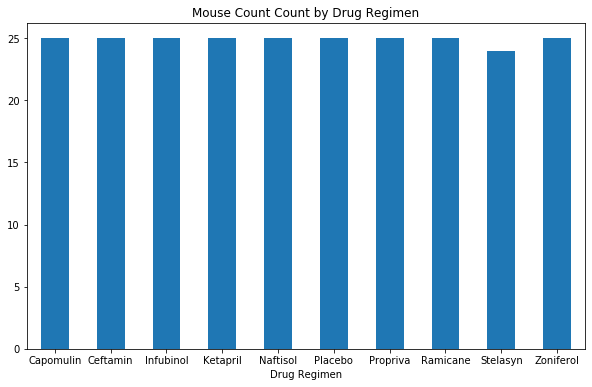

In [414]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#barPandas = merged_mice_unique.groupby('Drug Regimen').count()['Mouse ID'].plot(kind = 'bar', figsize = (10,6), title = 'Mouse Count by Drug Regimen', rot = 0, yticks = range(0,275,25), ylim = (0, 250))
metaMice = mouse_metadata.groupby('Drug Regimen').count()['Mouse ID'].plot(kind = 'bar', figsize = (10,6), title = 'Mouse Count Count by Drug Regimen', rot = 0)

In [411]:
mouse_metadata['Mouse ID'].nunique()

249

In [320]:
mouse_count_per_treatment = merged_mice_unique.groupby('Drug Regimen').count()['Mouse ID']
mouse_count_per_treatment
# : 

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [334]:
mouse_count_per_treatment2 = mouse_count_per_treatment.to_frame()
mouse_count_per_treatment2 = mouse_count_per_treatment2.sort_values('Mouse ID', ascending = False)
mouse_count_per_treatment2

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


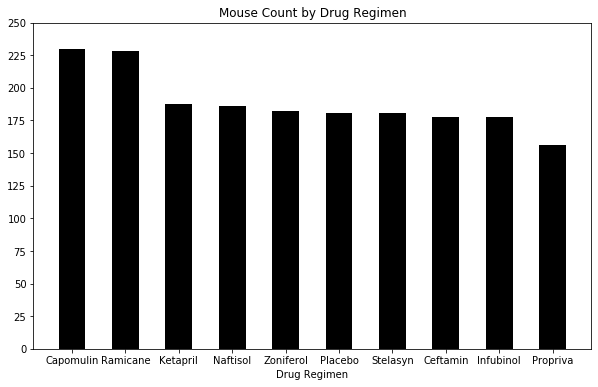

In [354]:
#USE THIS ONE FOR THE PYPlOT VERSION OF THE BAR GRAPH 
plt.figure(figsize = (10,6))
plt.bar(mouse_count_per_treatment2.index, mouse_count_per_treatment2['Mouse ID'], color = 'black', width = 0.5)
plt.ylim(0,250)
plt.title('Mouse Count by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.yticks(np.arange(0, 275, 25))
plt.show()

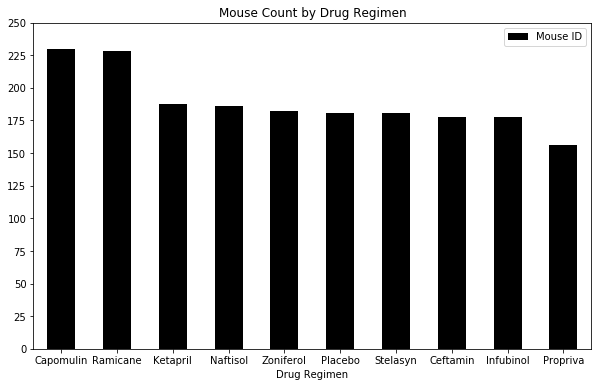

In [352]:
#USE THIS ONE FOR THE PANDAS GRAPH OF MOUSE COUNT BY DRUG REGIMEN! 
barPandas2 = mouse_count_per_treatment2.plot(kind = 'bar', figsize = (10,6), title = 'Mouse Count by Drug Regimen', rot = 0, yticks = range(0,275,25), ylim = (0, 250), color = 'black')

In [353]:
#Might not need this but keeping for now
#treatment_names = merged_mice_unique['Drug Regimen'].unique()
#treatment_names = treatment_names.tolist()
#treatment_names = sorted(treatment_names)
#treatment_names

In [355]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#Probably don't need this anymore but keeping for now
#plt.figure(figsize = (10,6))
#plt.bar(treatment_names, mouse_count_per_treatment, width = 0.5)
#plt.ylim(0,250)
#plt.title('Mouse Count by Drug Regimen')
#plt.xlabel('Drug Regimen')
#plt.yticks(np.arange(0, 275, 25))
#plt.show()

Text(0, 0.5, '')

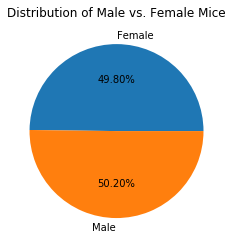

In [421]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
piePandas = sexCount.plot(kind = 'pie', autopct = '%1.2f%%', title = 'Distribution of Male vs. Female Mice')
pylab.ylabel('')

In [144]:
merged_mice_unique

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,f932,0,45.000000,0,Ketapril,Male,15,29
2,2,g107,0,45.000000,0,Ketapril,Female,2,29
3,3,a457,0,45.000000,0,Ketapril,Female,11,30
4,4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...,...
1883,1888,r944,45,41.581521,2,Capomulin,Male,12,25
1884,1889,u364,45,31.023923,3,Capomulin,Male,18,17
1885,1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1886,1891,x773,45,58.634971,4,Placebo,Female,21,30


In [253]:
sexCount
sexlabels = ['Female', 'Male']
sexCount

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

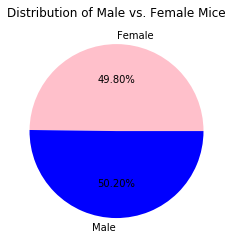

In [420]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexCount = mouse_metadata.groupby('Sex').count()['Mouse ID']
plt.pie(sexCount, labels = sexlabels, colors = ['pink', 'blue'], autopct = '%1.2f%%')
plt.title('Distribution of Male vs. Female Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [360]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_vol = merged_mice_unique[merged_mice_unique.Timepoint == 45]
final_vol.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse Count Per Treatment
1758,1763,n364,45,31.095335,1,Ramicane,Male,4,17,NaN
1759,1764,b128,45,38.982878,2,Capomulin,Female,9,22,NaN
1760,1765,l661,45,59.851956,3,Ceftamin,Male,18,26,NaN
1761,1766,y865,45,64.729837,3,Ceftamin,Male,23,26,NaN
1762,1767,y769,45,68.594745,4,Ceftamin,Female,6,27,NaN


In [365]:
### Last time point for each mouse is in above frame called final_vol. done above in final_vol 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_vol_by_treatment = final_vol.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
final_vol_by_treatment = round(final_vol_by_treatment, 2)
final_vol_by_treatment = final_vol_by_treatment.to_frame()
type(final_vol_by_treatment)

pandas.core.frame.DataFrame

In [580]:
# Put treatments into a list for later use
treatment_names_4 = [treatment_names[0], treatment_names[1], treatment_names[2], treatment_names[7]]
treatment_names_4 

In [579]:
#Compile the top 4 most promising treatments into their own dataframe for IQR analysis. 
final_vol_top4 = final_vol_capomulin_frame.append([final_vol_ceftamin_frame, final_vol_infubinol_frame, final_vol_ramicane_frame])
#final_vol_top4 

In [458]:
#Calculate IQR for final tumor volume, to be used in below cell for outliers.
quartiles = final_vol_top4.quantile([.25,.5,.75]).reset_index()
quartiles.columns = ['quartile', 'index', 'timepoint', 'tumor_vol', 'met_sites', 'age_months', 'weight', 'mouse_count_per_treatment']
quartiles
lowerq = quartiles[quartiles.quartile == 0.25]
upperq = quartiles[quartiles.quartile == 0.75]
upperTumor = float(upperq['tumor_vol'])
upperTumor
lowerTumor = float(lowerq['tumor_vol'])
lowerTumor
iqr = upperTumor - lowerTumor
iqr

28.66218635

In [578]:
#Use IQR to determine potential outliers across top 4 treatments
lower_bound = lowerTumor - (1.5*iqr)
upper_bound = upperTumor + (1.5*iqr)
lower_outliers = []
upper_outliers = []
for vol in final_vol_top4['Tumor Volume (mm3)']:
    if vol < lower_bound:
        lower_outliers = lower_outliers.append(vol)
    elif vol > upper_bound:
        upper_outliers = upper_outliers.append(vol)
#No potential outliers across top 4 treatments, tested max and min. 

In [577]:
#Put final tumor volumes for Capomulin treatment into their own df 
final_vol_capomulin_frame = final_vol[final_vol['Drug Regimen'] == 'Capomulin']
final_vol_capomulin_frame.head()

In [576]:
#Put final tumor volumes for Ceftamin treatment into their own df
final_vol_ceftamin_frame = final_vol[final_vol['Drug Regimen'] == 'Ceftamin']
final_vol_ceftamin_frame.head()

In [575]:
#Put final tumor volumes for infubinol treatment into their own df 
final_vol_infubinol_frame = final_vol[final_vol['Drug Regimen'] == 'Infubinol']
final_vol_infubinol_frame.head()

In [574]:
#Put final tumor volumes for ramicane treatment into their own df 
final_vol_ramicane_frame = final_vol[final_vol['Drug Regimen'] == 'Ramicane']
final_vol_ramicane_frame.head()

In [396]:
#Put final tumor volumes for capomulin treatment into a list
tumor_vol_capomulin = final_vol_capomulin_frame['Tumor Volume (mm3)'].tolist()
tumor_vol_capomulin = [round(vol, 2) for vol in tumor_vol_capomulin]
tumor_vol_capomulin
    

In [399]:
#Put final tumor volumes for ceftamin treatment into a list
tumor_vol_ceftamin = final_vol_ceftamin_frame['Tumor Volume (mm3)'].tolist()
tumor_vol_ceftamin = [round(vol, 2) for vol in tumor_vol_ceftamin]
tumor_vol_ceftamin

In [573]:
#Put final tumor volumes for infubinol into a list
tumor_vol_infubinol = final_vol_infubinol_frame['Tumor Volume (mm3)'].tolist()
tumor_vol_infubinol = [round(vol, 2) for vol in tumor_vol_infubinol]
tumor_vol_infubinol

In [572]:
#Put final tumor volumes for Ramicane into a list
tumor_vol_ramicane = final_vol_ramicane_frame['Tumor Volume (mm3)'].tolist()
tumor_vol_ramicane = [round(vol, 2) for vol in tumor_vol_ramicane]
tumor_vol_ramicane

Text(0.5, 1.1, 'Distribution of Final Tumor Volume Top 4 Treatments')

<Figure size 864x864 with 0 Axes>

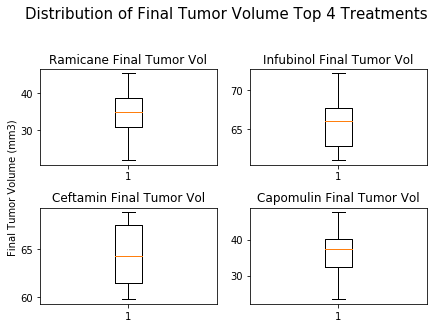

In [571]:
#Set up all box plots into a larger subplot
plt.figure(figsize = (12,12))
fig, axs = plt.subplots(2,2)
axs[0, 0].boxplot(tumor_vol_ramicane)
axs[0, 0].set_title('Ramicane Final Tumor Vol')
axs[0, 1].boxplot(tumor_vol_infubinol)
axs[0, 1].set_title('Infubinol Final Tumor Vol')
axs[1, 0].boxplot(tumor_vol_ceftamin)
axs[1, 0].set_title('Ceftamin Final Tumor Vol')
axs[1, 1].boxplot(tumor_vol_capomulin)
axs[1, 1].set_title('Capomulin Final Tumor Vol')
plt.tight_layout(pad = 1.0)
fig.text(0.005, 0.5, 'Final Tumor Volume (mm3)', ha='center', va='center', rotation = 'vertical')
fig.text(0.5, 1.1, 'Distribution of Final Tumor Volume Top 4 Treatments', ha='center', va='center', size = 15)

## Line and Scatter Plots

In [569]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
##Choose a mouse treated with capomulin randomly, then put that mouse's data into its own dataframe
#NOTE: DO NOT RUN THIS CELL AGAIN! IT WILL PICK A DIFFERENT MOUSE AND THEN THE CODE BELOW WILL CHANGE! 
capMouseRow = np.random.choice(merged_mice_unique[merged_mice_unique['Drug Regimen']=='Capomulin'].index.values, 1)
capMouse = merged_mice_unique[merged_mice_unique['Mouse ID'] == 'i738']
capMouse

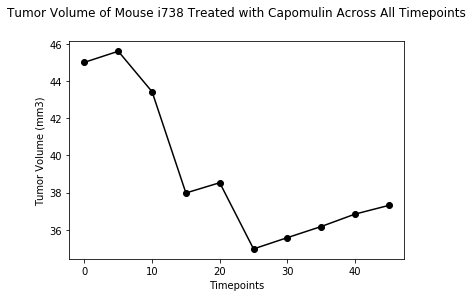

In [538]:
##Construct a line plot of the randomly selected mouse's tumor volume data using pyplot. 
plt.plot(capMouse['Timepoint'], capMouse['Tumor Volume (mm3)'], marker = 'o', color = 'black')
plt.title('Tumor Volume of Mouse i738 Treated with Capomulin Across All Timepoints', size = 12, pad = 25)
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#Make a dataframe out of the unique mouse/timepoint data where it's only the mice treated w/capomulin across all timepoints
capomulin = merged_mice_unique[merged_mice_unique['Drug Regimen']== 'Capomulin']

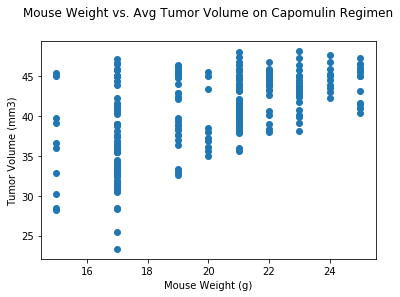

In [546]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capomulin['Weight (g)'], capomulin['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Avg Tumor Volume on Capomulin Regimen', size = 12, pad = 25)
plt.show()

## Correlation and Regression

In [550]:
#Calculate linear regression between mouse weight and tumor volume. Use unpacking to individually access each element
#of the regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_weight_vol['Weight (g)'], cap_weight_vol['Tumor Volume (mm3)'])

0.9609669432428355

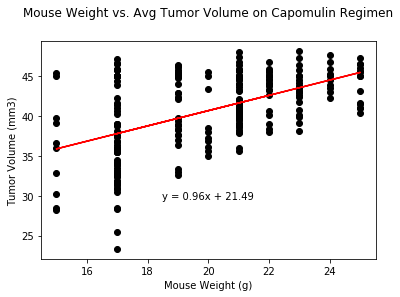

In [568]:
#Repeating code from above to annotate graph w/line equation
reg_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = capomulin['Weight (g)'] * slope + intercept
plt.scatter(capomulin['Weight (g)'], capomulin['Tumor Volume (mm3)'], color = 'black')
plt.plot(capomulin['Weight (g)'],regress_values,"r-")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Avg Tumor Volume on Capomulin Regimen', size = 12, pad = 25)
plt.text(20, 30, reg_line, ha='center', va='center')
plt.show()

In [308]:
#Calculate correlation coefficient for mouse weight and avg tumor volume for capomulin regimen 
cap_weight_vol = capomulin[['Weight (g)', 'Tumor Volume (mm3)']]
corr = cap_weight_vol.corr(method = 'pearson')
corr

,Weight (g),Tumor Volume (mm3)
Weight (g),1.0000,0.5257
Tumor Volume (mm3),0.5257,1.0000
